In [11]:
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt

In [46]:
# grab the street network for our area of interest
G = ox.graph.graph_from_place('Borough of Barnet, London, UK', network_type='drive')

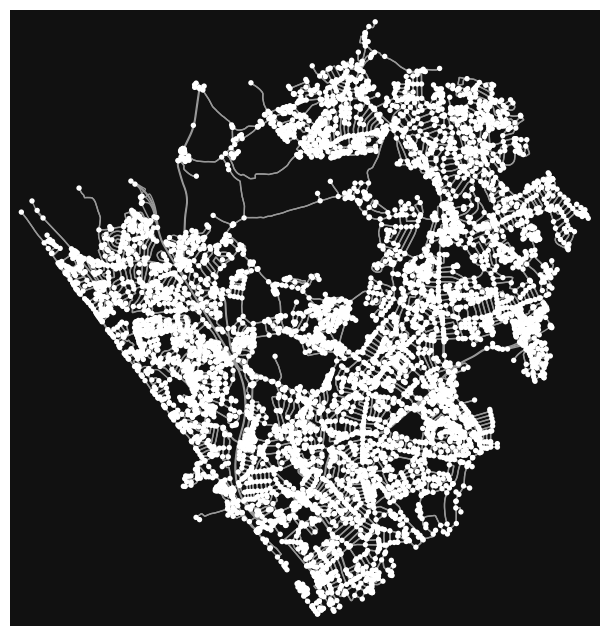

In [47]:
# remember how to plot the graph
fig, ax = ox.plot_graph(G)

In [7]:
# get the administrative boundary of the area
area = ox.geocode_to_gdf('Borough of Barnet, London, UK')

In [31]:
retail = pd.read_csv("geolytix_retailpoints_v34_202412.csv")
retail = gpd.GeoDataFrame(retail, geometry=gpd.points_from_xy(retail['long_wgs'], retail['lat_wgs']), crs="EPSG:4326")
retail = retail[retail['geometry'].within(area.loc[0, 'geometry'])]
retail.head()

,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county,geometry
8758,1010023506,Tesco,Tesco Express,Tesco Watling Ave Express,74 -76 Watling Avenue,NaN,London,Burnt Oak,HA8 0LU,-0.264681,51.601977,520280.262783,190663.529338,Rooftop,20241129.0,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.26468 51.60198)
8762,1010011495,Iceland,Iceland,Iceland Edgware,102-106 Station Road,NaN,London,Edgware,HA8 7AA,-0.277155,51.612006,519390.131479,191758.348228,Rooftop,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Greater London,POINT (-0.27715 51.61201)
8765,1010006725,Waitrose,Waitrose,Waitrose Mill Hill,2 Langstone Way,Mill Hill,London,Mill Hill East,NW7 1GU,-0.209071,51.607243,524117.001491,191341.998235,Rooftop,NaN,"15,069 < 30,138 ft2 (1,400 < 2,800 m2)",Greater London,POINT (-0.20907 51.60724)
8768,1010005394,Tesco,Tesco Express,Tesco Cricklewood Broadway Express,214-218 Cricklewood Broadway,Portfield,London,Cricklewood,NW2 3DR,-0.216899,51.558346,523707.621491,185891.178214,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.2169 51.55835)
8769,1010009274,The Co-operative Group,The Co-operative Food,Co-op Cricklewood,Cricklewood Lane,Cricklewood,London,Cricklewood,NW2 1ET,-0.215118,51.557194,523834.202591,185766.021814,Rooftop,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Greater London,POINT (-0.21512 51.55719)


In [34]:
import re
def extract_square_meter(x):
    # Match the square meter value, even if there is a range
    match = re.search(r'\((\d{1,3}(?:,\d{3})*)\s*(?:<\s*\d{1,3}(?:,\d{3})*)?\s*m2\)', x)
    if match:
        # Extract the first value in the range, or the single value
        square_meter_str = match.group(1).replace(",", "")
        return int(square_meter_str)
    return None  # Return None if no match is found

retail['square_meters'] = retail['size_band'].apply(lambda x: extract_square_meter(x))
retail


,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county,geometry,square_meters
8758,1010023506,Tesco,Tesco Express,Tesco Watling Ave Express,74 -76 Watling Avenue,NaN,London,Burnt Oak,HA8 0LU,-0.264681,51.601977,520280.262783,190663.529338,Rooftop,20241129.0,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.26468 51.60198),280
8762,1010011495,Iceland,Iceland,Iceland Edgware,102-106 Station Road,NaN,London,Edgware,HA8 7AA,-0.277155,51.612006,519390.131479,191758.348228,Rooftop,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Greater London,POINT (-0.27715 51.61201),280
8765,1010006725,Waitrose,Waitrose,Waitrose Mill Hill,2 Langstone Way,Mill Hill,London,Mill Hill East,NW7 1GU,-0.209071,51.607243,524117.001491,191341.998235,Rooftop,NaN,"15,069 < 30,138 ft2 (1,400 < 2,800 m2)",Greater London,POINT (-0.20907 51.60724),1400
8768,1010005394,Tesco,Tesco Express,Tesco Cricklewood Broadway Express,214-218 Cricklewood Broadway,Portfield,London,Cricklewood,NW2 3DR,-0.216899,51.558346,523707.621491,185891.178214,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.2169 51.55835),280
8769,1010009274,The Co-operative Group,The Co-operative Food,Co-op Cricklewood,Cricklewood Lane,Cricklewood,London,Cricklewood,NW2 1ET,-0.215118,51.557194,523834.202591,185766.021814,Rooftop,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Greater London,POINT (-0.21512 51.55719),280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18396,1010005037,Tesco,Tesco Express,Tesco Edgware Hale Ln Express,294-296 Hale Lane,Edgware,London,Edgware,HA8 8NP,-0.275066,51.616345,519523.331479,192244.298230,Rooftop,NaN,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.27507 51.61634),280
18397,1010021839,Asda,Asda Express,Asda Observatory Express Petrol,520-522 Watford Way,NaN,London,Mill Hill,NW7 2PT,-0.242115,51.615616,521806.533645,192217.649133,Rooftop,20231110.0,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.24211 51.61562),280
18398,1010002025,Marks and Spencer,Marks and Spencer Simply Food,M&S Mill Hill SF,3-7 The Broadway,Mill Hill,London,Mill Hill,NW7 3LN,-0.249255,51.614217,521315.921484,192050.148233,Rooftop,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Greater London,POINT (-0.24926 51.61422),280
18399,1010015664,The Co-operative Group,The Co-operative Food,Co-op Edgware - Hale Lane,157-161 Hale Lane,NaN,London,Mill Hill,HA8 9QW,-0.261332,51.616979,520472.504433,192337.401300,Rooftop,20199999.0,"< 3,013 ft2 (280m2)",Greater London,POINT (-0.26133 51.61698),280


In [ ]:
nodes, edges = ox.graph_to_gdfs(G)

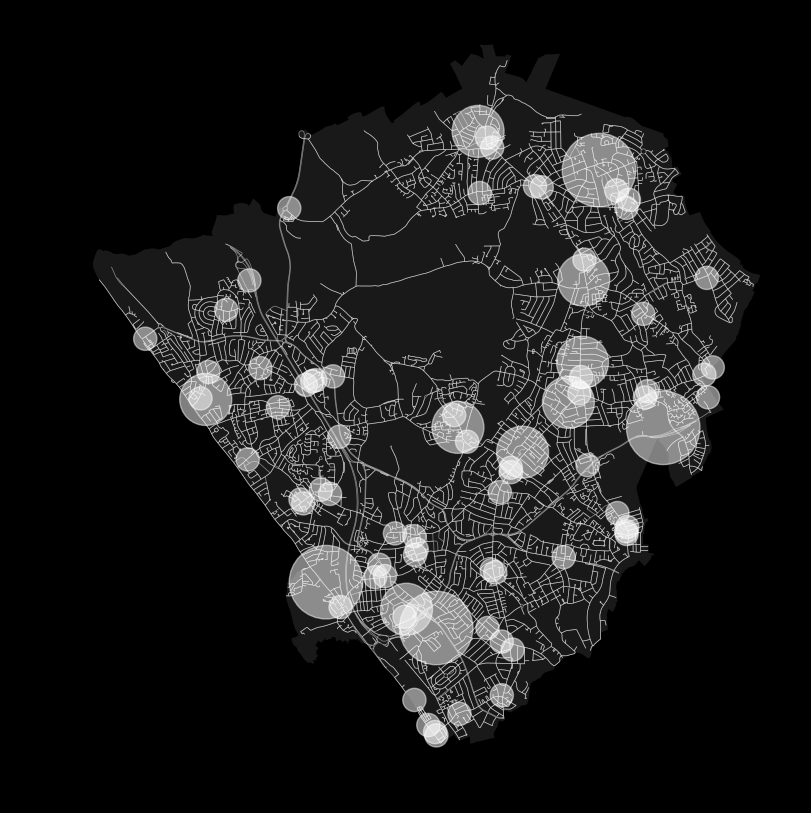

In [41]:

fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
area.plot(ax=ax, facecolor='w', alpha=0.1)
edges.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)
ax.set_facecolor('k')

In [50]:
# get the nearest network node to each point
retail['nodes'] = ox.nearest_nodes(G, retail['long_wgs'], retail['lat_wgs'])

In [52]:
retail['nodes'].to_numpy()

array([   26847282,   894601346,    14957034,      271864,  9448733676,
        5486535389,      519095,   357296041,      222460,  9273434187,
          77116370,  2104678677, 11231325880,      222461,    26370856,
            196882,  5225620055,  2118729791,   621392667,  5220874280,
         586951860,  9519596526,    21539550,  1449468325,  5226867628,
        5225620076,   272725369,  5220937755,  5220937736,      195764,
        5503766630,   106246735,    32033067,      198660,    20838350,
         620020364,   450949413,    25286568,    26845120,  8950897453,
        2100025353,   451040639,      104439,      202052,  2091495045,
        9183219707,  2104915382,    26948252,    49245351,    17902954,
            195401,      196294,      201017,      271497,  5225620081,
            196074,      196020,  1030634588,   878467846,  5220874280,
        1889845578,      195402,      196108,      196323,      489665,
        1713269918,      209129,  7625393956,      196060,  8164

In [53]:
# get the shortest paths from all the nodes to all the entraces nodes
%time lines = nx.multi_source_dijkstra_path(G, set(retail['nodes'].to_numpy()), weight='length')
# voronoi cells creates a voronoi using the network rather than euclidean distance
%time cells = nx.voronoi_cells(G, set(retail['nodes'].to_numpy()), weight='length')

CPU times: user 41.7 ms, sys: 2.36 ms, total: 44.1 ms
Wall time: 42.7 ms
CPU times: user 32.2 ms, sys: 1.54 ms, total: 33.7 ms
Wall time: 33.7 ms


In [100]:
merged = pd.concat(cells).merge(nodes, left_on='child', right_on='osmid', how='left')

In [101]:
import colorcet as cc

Text(0.5, 1.0, 'Grocery Catchments')

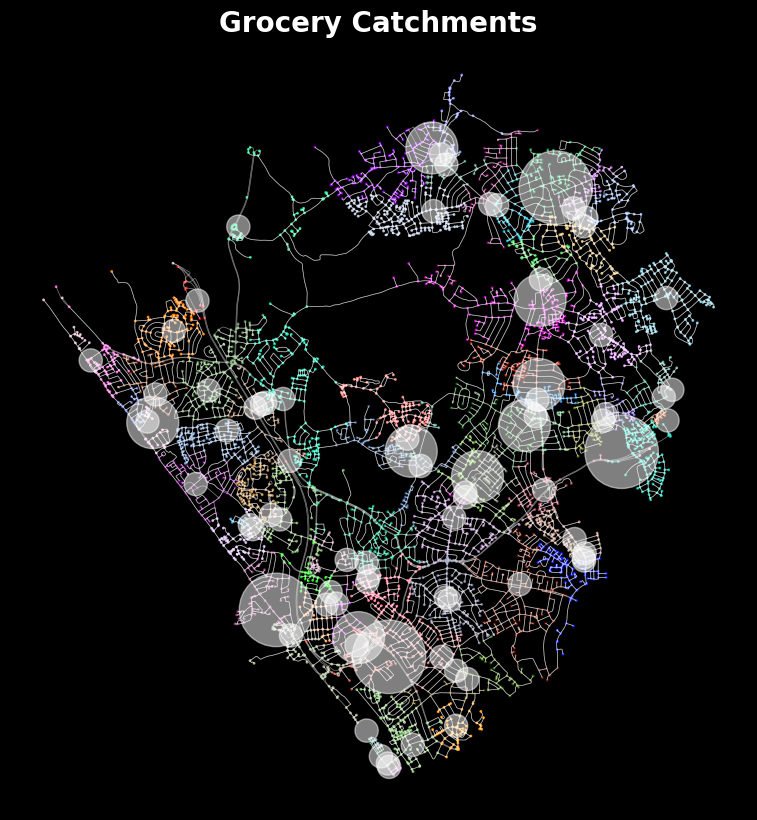

In [107]:
# plot the edges in black
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
edges.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)

# convert the merge cell dataframe to a geodataframe and plot it
gpd.GeoDataFrame(merged, 
                 geometry=gpd.points_from_xy(merged['x'], merged['y']), 
                 crs=4326).plot('parent', markersize=1, cmap=cc.cm.glasbey_dark, ax=ax)

# plot the stores in light grey to highlight them
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)

# clean it up
ax.set_axis_off()
ax.set_facecolor('k')

# add a title
ax.set_title('Grocery Catchments', fontsize=20, fontweight='bold', color='w')

In [138]:
# let's check the distances to shops from all nodes
%time lengths = nx.multi_source_dijkstra_path_length(G, set(retail['nodes'].to_numpy()), weight="length")

CPU times: user 26.7 ms, sys: 1.35 ms, total: 28.1 ms
Wall time: 27.1 ms


In [140]:
# make a data frame of the lengths
lengths = pd.DataFrame({'osmid':lengths.keys(), 'distance': lengths.values()})
lengths = lengths[lengths['distance'] < 2500]

Text(0.5, 1.0, 'Grocery Distances')

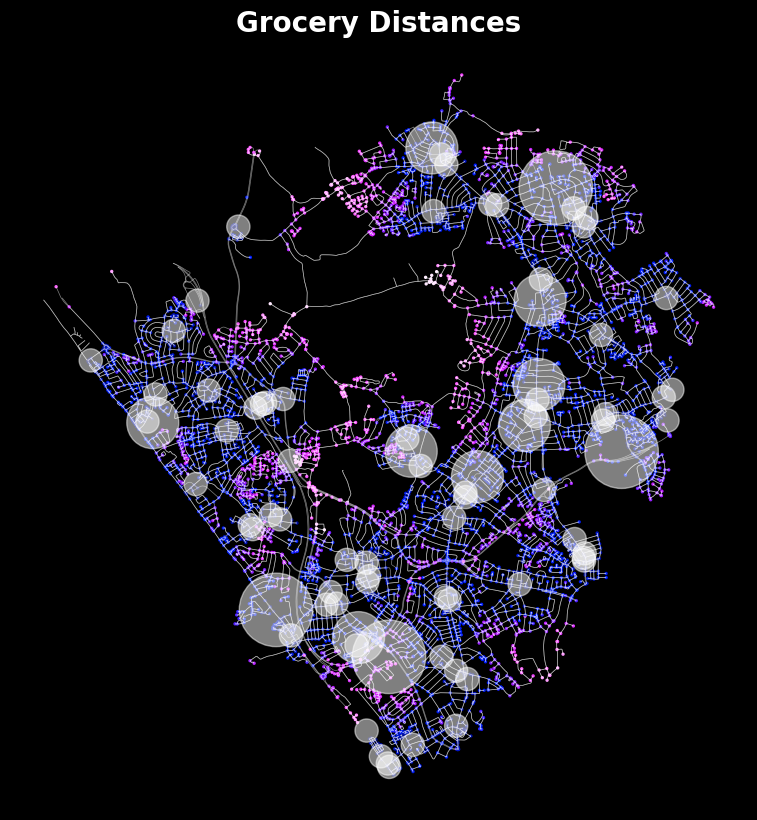

In [141]:
# same as before but with distance as the column of interest
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')
edges.plot(color='w', ax=ax, linewidth=0.5, alpha=0.5)
gpd.GeoDataFrame(merged, 
                 geometry=gpd.points_from_xy(merged['x'], merged['y']), 
                 crs=4326).merge(lengths, 
                                 left_on='child', 
                                 right_on='osmid',
                                 how='left').plot('distance', markersize=2, cmap=cc.cm.bmw, ax=ax)

# plot the stores in light grey to highlight them
retail.plot(color='w', ax=ax, markersize='square_meters', alpha=0.5)

# clean it up
ax.set_axis_off()
ax.set_facecolor('k')

# add a title
ax.set_title('Grocery Distances', fontsize=20, fontweight='bold', color='w')